* Görselleştirme hem anlatmak için hemde etkilemek içindir !!

In [3]:
import numpy as np 
import pandas as pd 
from collections import Counter
%matplotlib inline
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
median_house_hold_in_come = pd.read_csv("MedianHouseholdIncome2015.csv",encoding = "windows-1252")
percentage_people_below_powerty_level = pd.read_csv("PercentagePeopleBelowPovertyLevel.csv",encoding = "windows-1252")
percent_over_25_completed_highschool = pd.read_csv("PercentOver25CompletedHighSchool.csv",encoding = "windows-1252")
share_race_city = pd.read_csv("ShareRaceByCity.csv",encoding = "windows-1252")
police_kill = pd.read_csv("PoliceKillingsUS.csv", encoding = "windows-1252")

In [5]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [6]:
percentage_people_below_powerty_level.info()
percentage_people_below_powerty_level.poverty_rate.value_counts() # görüldüğü gibi elimizde "-" diye bir veri var bunkarı 0 a çevireceğiz

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


0       1464
-        201
7.4      129
6.7      129
10.9     128
        ... 
93.3       1
91.9       1
56.5       1
61.5       1
67.1       1
Name: poverty_rate, Length: 771, dtype: int64

In [11]:
percentage_people_below_powerty_level["Geographic Area"].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'DC', 'FL', 'GA',
       'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA',
       'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY',
       'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX',
       'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

Öncelikle "-" değerlerini 0.0 a çevireceğiz ardından info bilgisinda gördüğümüz poverty_rate bir oran ifadesi ancak bu object gözüküyor yani str girilmiş biz bunun float olmasını istiyoruz.

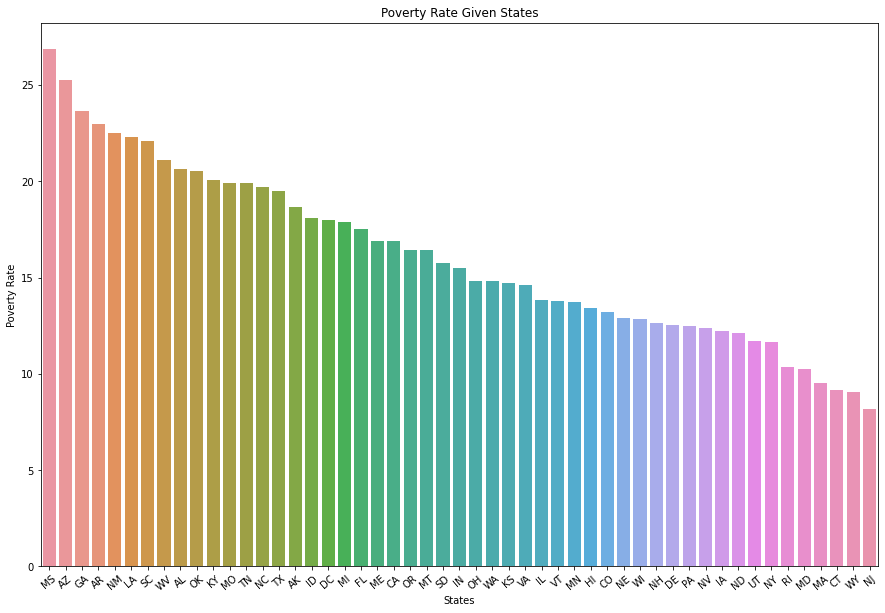

In [12]:
#Poverty rate of each state
percentage_people_below_powerty_level.poverty_rate.replace(["-"],0.0,inplace = True)
percentage_people_below_powerty_level.poverty_rate = percentage_people_below_powerty_level.poverty_rate.astype(float)

area_list = list(percentage_people_below_powerty_level["Geographic Area"].unique()) # hep aynı değerleri yazdırmadık yani yukarda
area_povert_ratio = []

for i in area_list:
    x = percentage_people_below_powerty_level[percentage_people_below_powerty_level["Geographic Area"] == i]
    area_poverty_rate = sum(x.poverty_rate)/len(x)
    area_povert_ratio.append(area_poverty_rate)
data = pd.DataFrame({"area_list":area_list,"area_poverty_ratio":area_povert_ratio})
new_index = (data["area_poverty_ratio"].sort_values(ascending = False)).index.values
sorted_data = data.reindex(new_index)

#visualization
plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data["area_list"],y=sorted_data["area_poverty_ratio"])
plt.xticks(rotation=40)
plt.xlabel("States")
plt.ylabel("Poverty Rate")
plt.title("Poverty Rate Given States")
plt.show()

### most common 15 name or surname of killed people

In [17]:
police_kill.info()
police_kill.name.value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

TK TK                       49
Michael Johnson              2
Daquan Antonio Westbrook     2
Brandon Jones                2
TK Tk                        2
                            ..
James W. Jennings            1
Adam Jo Klimek               1
Danny Rendon                 1
Elton Simpson                1
Isaiah Murrietta-Golding     1
Name: name, Length: 2481, dtype: int64

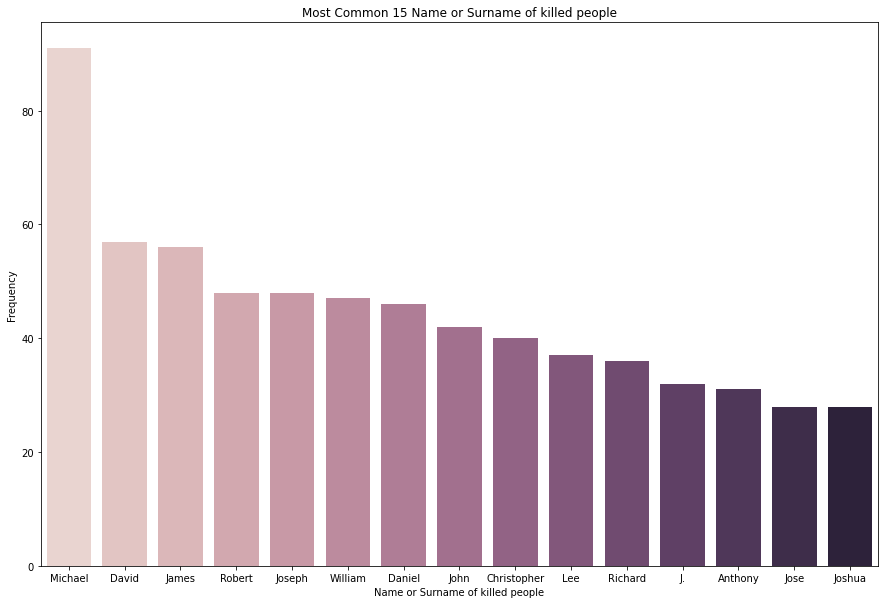

In [18]:
separate = police_kill.name[police_kill.name != "TK TK"].str.split()
a,b = zip(*separate)
name_list = a+b
name_count = Counter(name_list)
most_common_names = name_count.most_common(15)
x,y = zip(*most_common_names)
x,y = list(x),list(y)

#visualization

plt.figure(figsize=(15,10))
sns.barplot(x=x,y=y,palette = sns.cubehelix_palette(len(x)))
plt.xlabel("Name or Surname of killed people")
plt.ylabel("Frequency")
plt.title("Most Common 15 Name or Surname of killed people")
plt.show()


### High school graduation rate of the population that is older than 25 in states

In [19]:
percent_over_25_completed_highschool.percent_completed_hs.value_counts()

100     1301
-        197
91.7     170
92.9     169
92.5     168
        ... 
32.9       1
42.7       1
51.9       1
17.1       1
30.5       1
Name: percent_completed_hs, Length: 728, dtype: int64

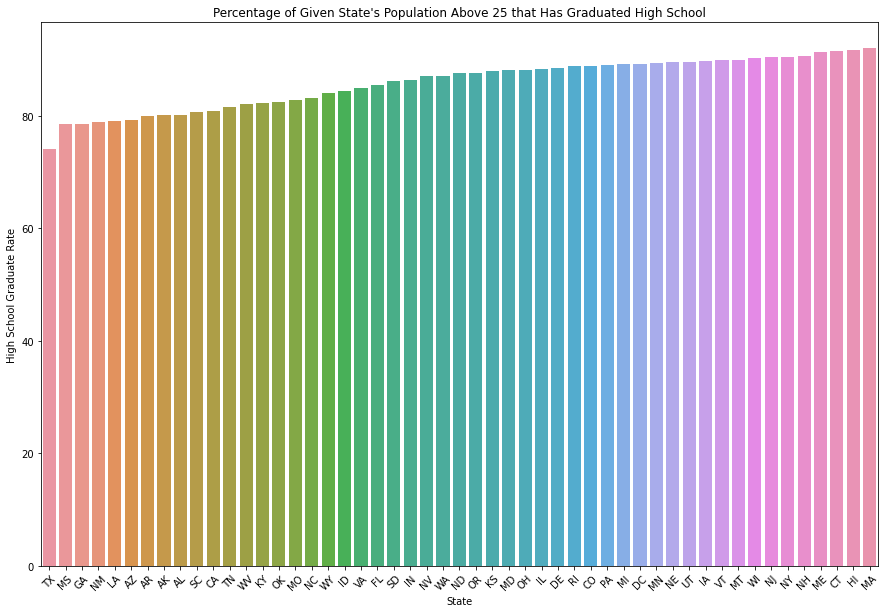

In [20]:


percent_over_25_completed_highschool.percent_completed_hs.replace(["-"],0.0,inplace = True)
percent_over_25_completed_highschool.percent_completed_hs = percent_over_25_completed_highschool.percent_completed_hs.astype(float)
area_list = list(percent_over_25_completed_highschool["Geographic Area"].unique())
area_highschool = []

for i in area_list:
    x = percent_over_25_completed_highschool[percent_over_25_completed_highschool["Geographic Area"]==i]
    area_highschool_rate = sum(x.percent_completed_hs)/len(x)
    area_highschool.append(area_highschool_rate)

data = pd.DataFrame({"area_list":area_list,"area_highschool_ratio":area_highschool})
new_index = (data["area_highschool_ratio"].sort_values(ascending=True)).index.values
sorted_data2 = data.reindex(new_index)

plt.figure(figsize=(15,10))
sns.barplot(x=sorted_data2["area_list"],y = sorted_data2["area_highschool_ratio"])
plt.xticks(rotation=45)
plt.xlabel("State")
plt.ylabel("High School Graduate Rate")
plt.title("Percentage of Given State's Population Above 25 that Has Graduated High School")
plt.show()

### Percentage of state's population according to races that are black,white,native american, asian and hispanic

In [21]:
share_race_city.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29268 entries, 0 to 29267
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Geographic area        29268 non-null  object
 1   City                   29268 non-null  object
 2   share_white            29268 non-null  object
 3   share_black            29268 non-null  object
 4   share_native_american  29268 non-null  object
 5   share_asian            29268 non-null  object
 6   share_hispanic         29268 non-null  object
dtypes: object(7)
memory usage: 1.6+ MB


In [34]:
share_race_city.head()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda CDP,67.2,30.2,0.0,0.0,1.6
1,AL,Abbeville city,54.4,41.4,0.1,1.0,3.1
2,AL,Adamsville city,52.3,44.9,0.5,0.3,2.3
3,AL,Addison town,99.1,0.1,0.0,0.1,0.4
4,AL,Akron town,13.2,86.5,0.0,0.0,0.3


In [23]:
share_race_city.City.value_counts()

Franklin city                16
Salem city                   14
Madison city                 14
Marion city                  14
Clinton city                 13
                             ..
San Angelo city               1
Navajo Mountain CDP           1
La Crescenta-Montrose CDP     1
Clarksville borough           1
Massena village               1
Name: City, Length: 24219, dtype: int64

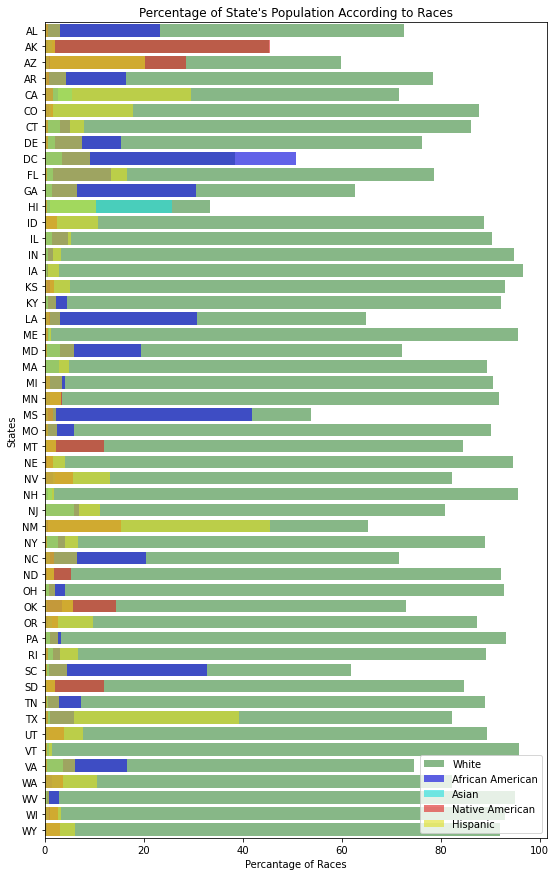

In [25]:
share_race_city.replace(["-"],0.0,inplace=True)
share_race_city.replace(["(X)"],0.0,inplace=True)
share_race_city.loc[:,["share_white","share_black","share_native_american","share_asian","share_hispanic"]] = share_race_city.loc[:,["share_white","share_black","share_native_american","share_asian","share_hispanic"]].astype(float)
area_list = list(share_race_city["Geographic area"].unique())
share_white = []
share_black = []
share_native_american = []
share_asian = []
share_hispanic = []
for i in area_list:
    x = share_race_city[share_race_city["Geographic area"] == i]
    share_white.append(sum(x.share_white)/len(x))
    share_black.append(sum(x.share_black)/len(x))
    share_hispanic.append(sum(x.share_hispanic)/len(x))
    share_native_american.append(sum(x.share_native_american)/len(x))
    share_asian.append(sum(x.share_asian)/len(x))
    
f,ax = plt.subplots(figsize = (9,15))
sns.barplot(x = share_white,y=area_list,color = "green",alpha = 0.5,label = "White")
sns.barplot(x = share_black,y=area_list,color = "blue",alpha = 0.7,label = "African American")
sns.barplot(x = share_asian,y=area_list,color = "cyan",alpha = 0.6,label = "Asian")
sns.barplot(x = share_native_american, y=area_list,color = "red",alpha = 0.6,label = "Native American")
sns.barplot(x = share_hispanic,y=area_list,color ="yellow",alpha = 0.6,label = "Hispanic")


ax.legend(loc = "lower right",frameon = True)
ax.set(xlabel = "Percantage of Races",ylabel = "States",title = "Percentage of State's Population According to Races")

plt.show()

### Highschool graduation rate vs Poverty rate of each state

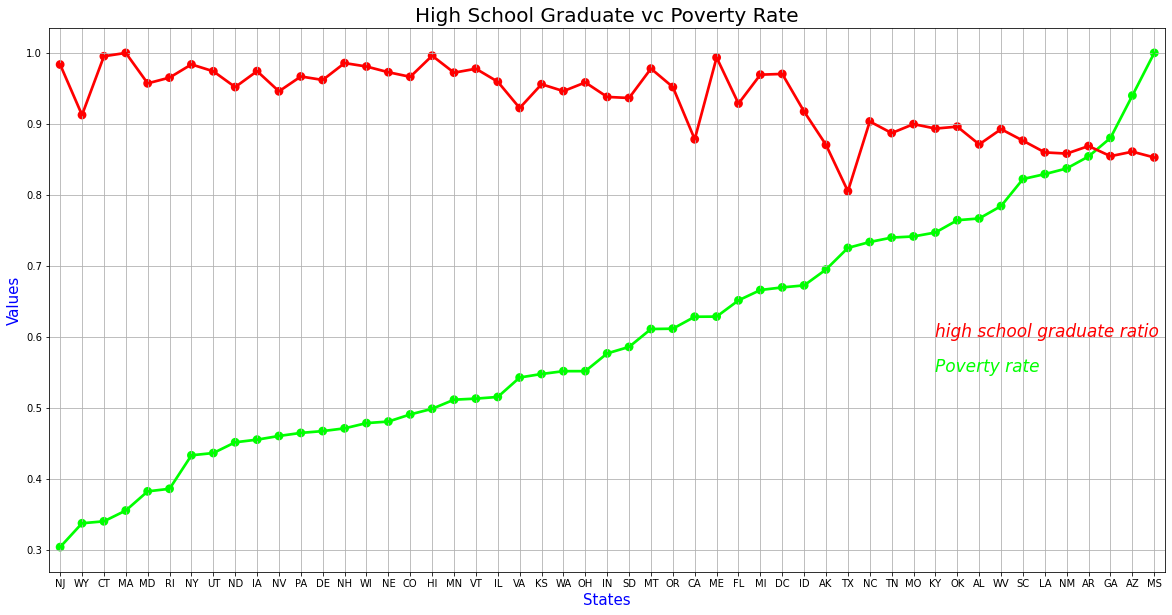

In [35]:
sorted_data["area_poverty_ratio"] = sorted_data["area_poverty_ratio"]/max(sorted_data["area_poverty_ratio"])
sorted_data2["area_highschool_ratio"] = sorted_data2["area_highschool_ratio"]/max(sorted_data2["area_highschool_ratio"])
data = pd.concat([sorted_data,sorted_data2["area_highschool_ratio"]],axis =1)
data.sort_values("area_poverty_ratio",inplace = True)

f,ax = plt.subplots(figsize = (20,10))
sns.pointplot(x = "area_list",y="area_poverty_ratio",data = data ,color = "lime",alpha = 0.8)
sns.pointplot(x = "area_list",y="area_highschool_ratio",data = data,color = "red",alpha = 0.8)
plt.text(40,0.6,"high school graduate ratio",color = "red",fontsize = 17,style = "italic")
plt.text(40,0.55,"Poverty rate",color = "lime",fontsize = 17,style ="italic")
plt.xlabel("States",fontsize = 15,color = "blue")
plt.ylabel("Values",fontsize = 15, color = "blue")
plt.title("High School Graduate vc Poverty Rate",fontsize = 20)
plt.grid()
plt.show()

In [36]:
data.head()

,area_list,area_poverty_ratio,area_highschool_ratio
30,NJ,0.303558,0.983615
50,WY,0.337139,0.912479
6,CT,0.339883,0.995254
21,MA,0.355090,1.000000
20,MD,0.382097,0.957107


C:\Users\oztur\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\oztur\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1840: UserWarning: JointGrid annotation is deprecated and will be removed in a future release.
  warnings.warn(UserWarning(msg))


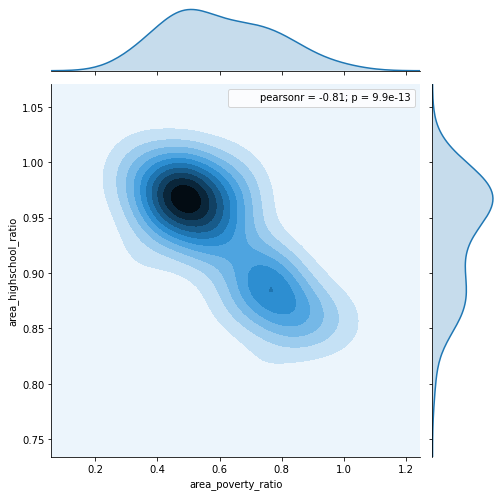

In [38]:
g = sns.jointplot(data.area_poverty_ratio,data.area_highschool_ratio,kind = "kde",size =7).annotate(stats.pearsonr)
plt.savefig("graph.png") #kaggle da gözüksün diye var
plt.show()

#pearsonr 1 ise pozitif ilişki -1 ise negatif ilişki var burada -81 ters ilişkili yani
# kind : ( scatter,reg,resid,kde,hex)

C:\Users\oztur\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2264: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


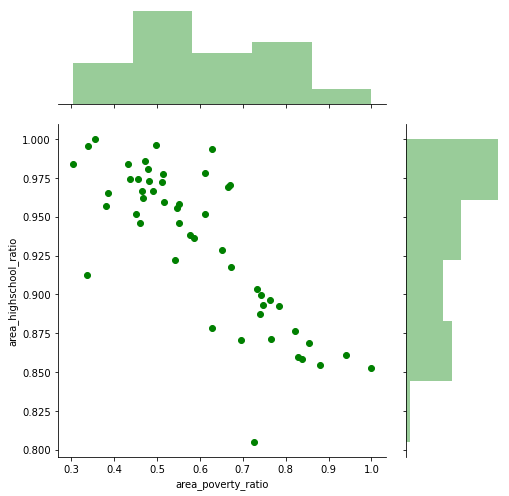

In [39]:
g = sns.jointplot("area_poverty_ratio","area_highschool_ratio",data = data,size = 7,ratio = 3,color = "g")

In [40]:
police_kill.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

Text(0.5, 1.0, 'Killed People According to Races')

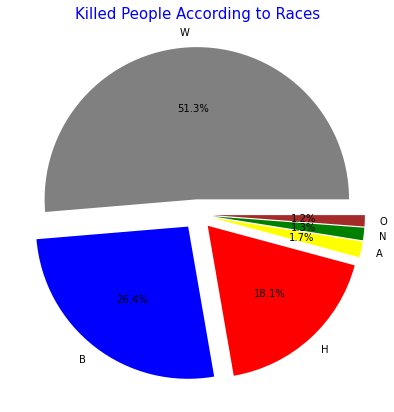

In [41]:
police_kill.race.dropna(inplace = True)
labels = police_kill.race.value_counts().index
colors = ["grey","blue","red","yellow","green","brown"]
explode = [0.10,0.10,0.10,0.10,0.10,0.10]
sizes = police_kill.race.value_counts().values


plt.figure(figsize = (7,7))
plt.pie(sizes, explode=explode,labels=labels, colors = colors, autopct="%1.1f%%")
plt.title("Killed People According to Races",color = "blue",fontsize =15)


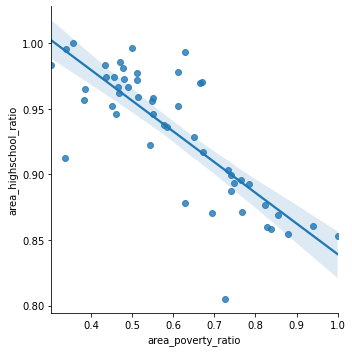

In [42]:
sns.lmplot(x="area_poverty_ratio",y="area_highschool_ratio",data = data)

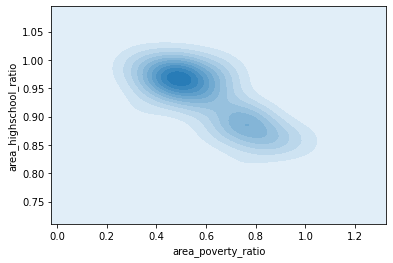

In [43]:
sns.kdeplot(data.area_poverty_ratio,data.area_highschool_ratio,shade=True,cut = 4)

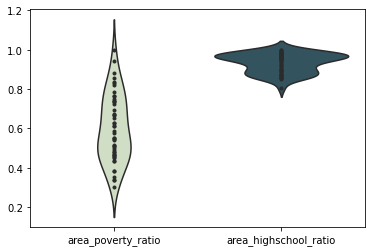

In [44]:
pal = sns.cubehelix_palette(2,rot =-.5, dark =.3)
sns.violinplot(data = data,palette=pal,inner = "points")
plt.show()

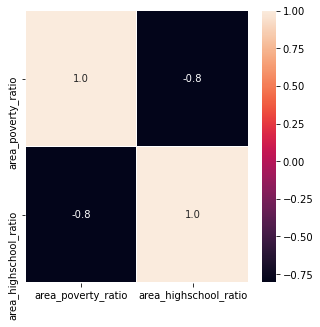

In [45]:
f, ax = plt.subplots(figsize = (5,5))
sns.heatmap(data.corr(),annot = True,linewidths=.5,fmt = ".1f",ax = ax)

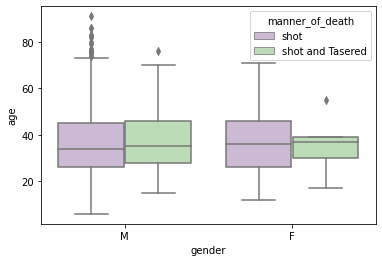

In [46]:
sns.boxplot(x = "gender",y = "age",hue = "manner_of_death", data = police_kill, palette= "PRGn")

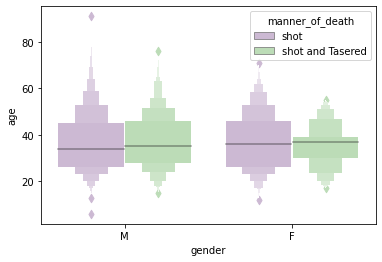

In [47]:
sns.boxenplot(x = "gender",y = "age",hue = "manner_of_death", data = police_kill, palette= "PRGn")

C:\Users\oztur\Anaconda3\lib\site-packages\seaborn\categorical.py:1311: RuntimeWarning: invalid value encountered in less
  off_low = points < low_gutter
C:\Users\oztur\Anaconda3\lib\site-packages\seaborn\categorical.py:1315: RuntimeWarning: invalid value encountered in greater
  off_high = points > high_gutter


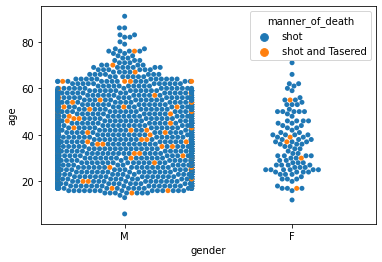

In [48]:
sns.swarmplot(x = "gender", y = "age", hue = "manner_of_death", data = police_kill)
plt.show()

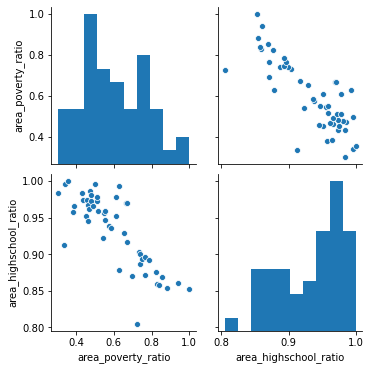

In [49]:
sns.pairplot(data)
plt.show()

Text(0.5, 1.0, 'Manner of Death')

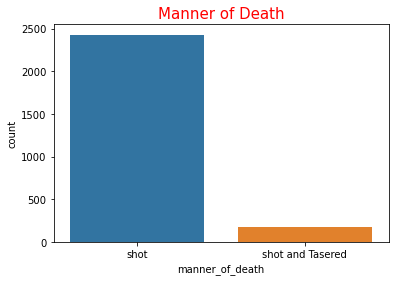

In [50]:
sns.countplot(police_kill.gender)
sns.countplot(police_kill.manner_of_death)
# iksini ayrı ayrı çizipde bakablrz burda ikisi birleşti
plt.title("Manner of Death",color = "red",fontsize = 15)

Text(0.5, 1.0, 'Kill weapon')

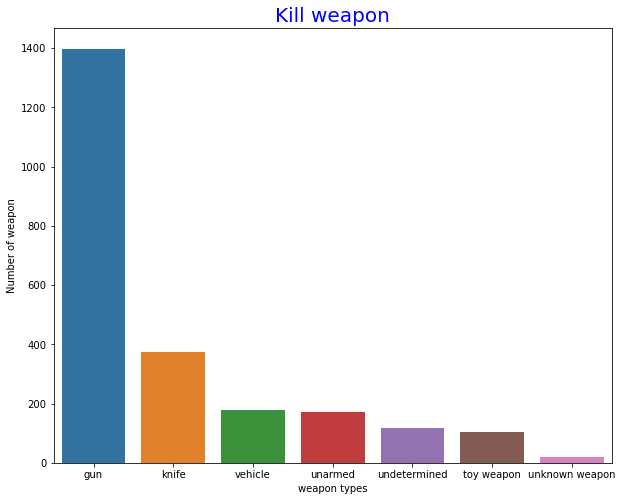

In [51]:
armed = police_kill.armed.value_counts()
plt.figure(figsize=(10,8))
sns.barplot(x = armed[:7].index, y = armed[:7].values)
plt.ylabel("Number of weapon")
plt.xlabel("weapon types")
plt.title("Kill weapon",color = "blue",fontsize = 20)

Text(0.5, 1.0, 'Age of Killed People')

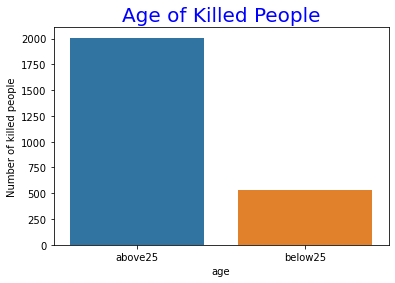

In [52]:
above25 = ["above25" if i >= 25 else "below25" for i in police_kill.age]
df = pd.DataFrame({"age": above25})
sns.countplot(x = df.age)
plt.ylabel("Number of killed people")
plt.title("Age of Killed People",color = "blue",fontsize = 20)